<a href="https://colab.research.google.com/github/chasubeen/Store-Sales-Forecasting/blob/%EC%88%98%EB%B9%88/2.%20preprocessing_%EC%B0%A8%EC%88%98%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 대회 소개**


- [대회 링크](https://www.kaggle.com/competitions/store-sales-time-series-forecasting)
- 시계열 예측을 사용하여 에콰도르 기반의 대형 식료품 소매업체인 Corporación Favorita의 `매장 판매량`을 예측하고자 함
  - Favorita 매장에서 판매되는 수천 개 제품들의 `단위 판매량`을 제품군 별로 더 정확하게 예측하는 모델을 구축하고자 함


**평가 지표**
- Root Mean Squared Logarithmic Error(`RMSLE`)
  - 다음과 같이 계산  
  $ \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $
  - $n$: 총 인스턴스 수
  - $ \hat{y}_i$: 인스턴스 $i$에 대한 타겟의 예측값
  - $y_i$: 인스턴스 $i$에 대한 타겟의 실제값

# **1. 병합된 데이터 불러오기**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째자리까지만 표시

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/winter_proj/방학프로젝트/train_merged.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/winter_proj/방학프로젝트/test_merged.csv')

In [4]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,Quito,Pichincha,D,13,NaN,NaN,National
1,1,2013-01-01,42,CELEBRATION,0.00,0.00,Cuenca,Azuay,D,2,NaN,NaN,National
2,2,2013-01-01,42,BREAD/BAKERY,0.00,0.00,Cuenca,Azuay,D,2,NaN,NaN,National
3,3,2013-01-01,42,BOOKS,0.00,0.00,Cuenca,Azuay,D,2,NaN,NaN,National
4,4,2013-01-01,42,BEVERAGES,0.00,0.00,Cuenca,Azuay,D,2,NaN,NaN,National


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008016 entries, 0 to 3008015
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   float64
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  holiday       object 
dtypes: float64(4), int64(3), object(6)
memory usage: 298.3+ MB


In [6]:
train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales             7128
onpromotion       7128
city                 0
state                0
type                 0
cluster              0
dcoilwtico      935550
transactions    252912
holiday              0
dtype: int64

In [7]:
train.describe()

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions
count,3008016.00,3008016.00,3000888.00,3000888.00,3008016.00,2072466.00,2755104.00
mean,1504007.50,27.50,357.78,2.60,8.48,67.93,1694.60
std,868339.57,15.59,1102.00,12.22,4.65,25.67,963.28
min,0.00,1.00,0.00,0.00,1.00,26.19,5.00
25%,752003.75,14.00,0.00,0.00,4.00,46.38,1046.00
50%,1504007.50,27.50,11.00,0.00,8.50,53.33,1393.00
75%,2256011.25,41.00,195.85,0.00,13.00,95.80,2079.00
max,3008015.00,54.00,124717.00,741.00,17.00,110.62,8359.00


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  int64  
 5   city         28512 non-null  object 
 6   state        28512 non-null  object 
 7   type         28512 non-null  object 
 8   cluster      28512 non-null  int64  
 9   dcoilwtico   21384 non-null  float64
 10  holiday      28512 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.4+ MB


In [9]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,Normal
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,Normal
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,Normal
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,Normal
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,Normal


In [10]:
test.describe()

,id,store_nbr,onpromotion,cluster,dcoilwtico
count,28512.00,28512.00,28512.00,28512.00,21384.00
mean,3015143.50,27.50,6.97,8.48,47.24
std,8230.85,15.59,20.68,4.65,0.75
min,3000888.00,1.00,0.00,1.00,45.96
25%,3008015.75,14.00,0.00,4.00,46.71
50%,3015143.50,27.50,0.00,8.50,47.25
75%,3022271.25,41.00,6.00,13.00,47.65
max,3029399.00,54.00,646.00,17.00,48.59


# **2. 데이터 전처리**

## **2-1. 판매 데이터**
- 원래 `train.csv`에 해당했던 변수들에 대한 전처리

### **a) 판매하지 않는 제품 처리**
- 해당 매장에서 전 기간에 걸쳐 매출액 합계가 0인 제품군 -> 안 파는 제품군이 아닐까?

In [11]:
# 각 가게별 제품군(family)별 판매액 합계 계산
sales_by_store_family = train.groupby(['store_nbr', 'family'])['sales'].sum().reset_index()

# 판매액 합계가 0인 행 추출
zero_sales = sales_by_store_family[sales_by_store_family['sales'] == 0]

# sales가 0인 행을 store_nbr 별로 다시 groupby
zero_family_by_store = zero_sales.groupby('store_nbr')['family'].apply(list)
zero_family_by_store

store_nbr
1                              [BABY CARE]
9                                  [BOOKS]
10                                 [BOOKS]
11                                 [BOOKS]
12                                 [BOOKS]
13                      [BABY CARE, BOOKS]
14                [BOOKS, LAWN AND GARDEN]
15                                 [BOOKS]
16                     [BOOKS, LADIESWEAR]
17                                 [BOOKS]
18                                 [BOOKS]
19                                 [BOOKS]
20                                 [BOOKS]
21                                 [BOOKS]
22                                 [BOOKS]
23                             [BABY CARE]
25                            [LADIESWEAR]
28                     [BOOKS, LADIESWEAR]
29                     [BOOKS, LADIESWEAR]
30                [BOOKS, LAWN AND GARDEN]
31                                 [BOOKS]
32                     [BOOKS, LADIESWEAR]
33                     [BOOKS, LADIESWEAR]
3

In [12]:
### 각 가게에서 판매하지 않는 제품군 삭제
# for문을 돌며 판매하는 제품만 남기기

for store_nbr, zero_sales_families in zero_family_by_store.items():
  train = train[~((train['store_nbr'] == store_nbr) & (train['family'].isin(zero_sales_families)))]

In [13]:
### 재확인

# 각 가게별 제품군(family)별 판매액 합계 계산
sales_by_store_family = train.groupby(['store_nbr', 'family'])['sales'].sum().reset_index()

# 판매액 합계가 0인 행 추출
zero_sales = sales_by_store_family[sales_by_store_family['sales'] == 0]

# sales가 0인 행을 store_nbr 별로 다시 groupby
zero_family_by_store = zero_sales.groupby('store_nbr')['family'].apply(list)
zero_family_by_store

Series([], Name: family, dtype: object)

In [14]:
train = train.reset_index(drop = True)

# id 재설정
train['id'] = train.index

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918552 entries, 0 to 2918551
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   float64
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  holiday       object 
dtypes: float64(4), int64(3), object(6)
memory usage: 289.5+ MB


- 깔끔하게 제거되었다.
- 이후 test 데이터에서 예측 시 해당 제품군들에 대한 예측값은 모두 0이 되어야 함!

### **b) 매장 개업일자 파악**
- 개업 이전에는 일자별로 가계의 매출 총액이 계속 0일 것임
  - 처음으로 0이 아닌 날짜 -> 개업 날짜

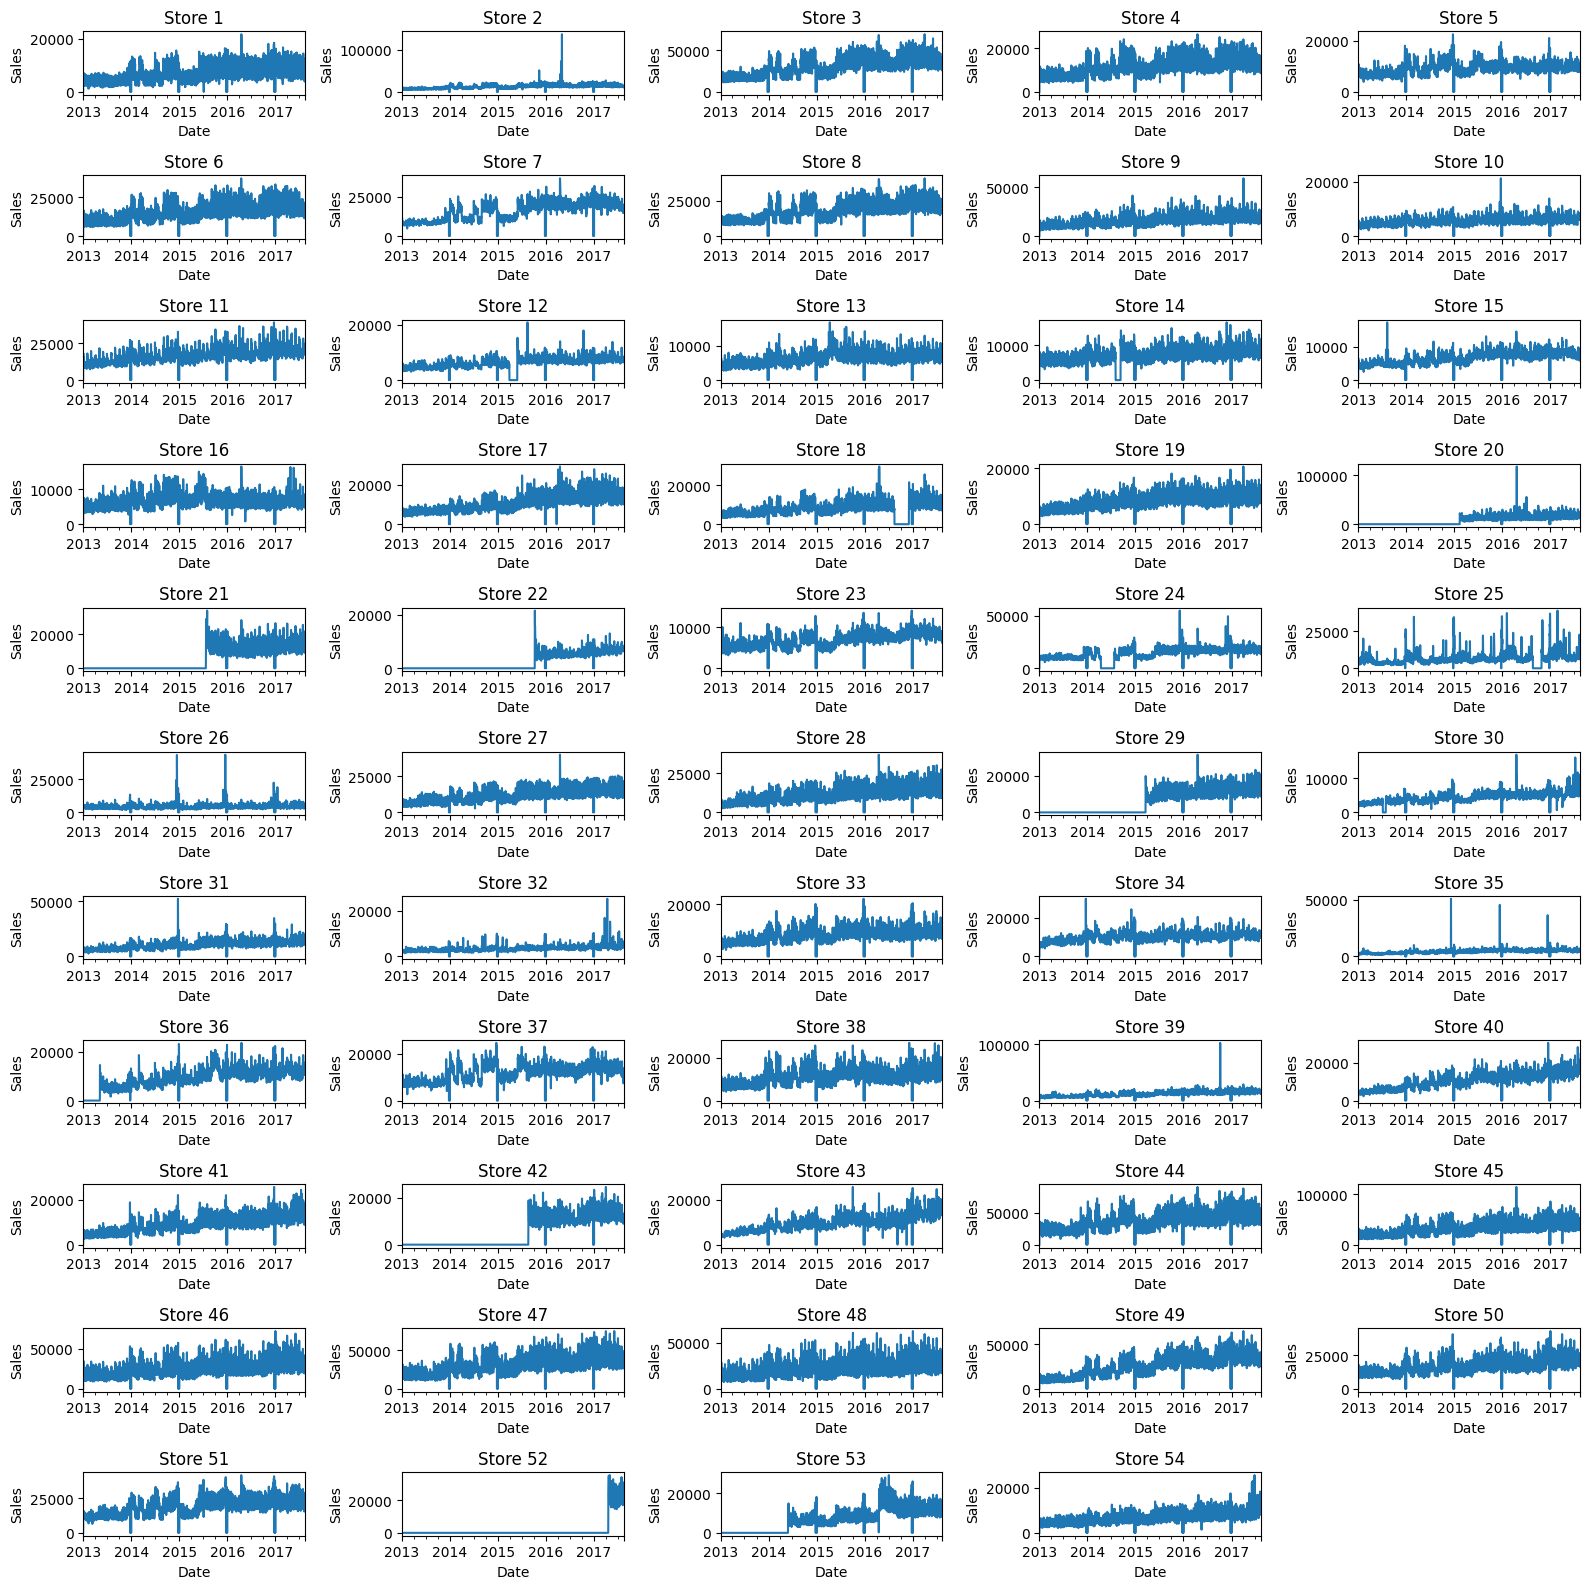

In [16]:
### 시각화 코드

# 'date' 열을 datetime 형식으로 변환
train['date'] = pd.to_datetime(train['date'])

# 매출 데이터를 날짜별, 가게별로 그룹화
a = train.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()

### 시각화
n_cols = 5
n_rows = 11

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))

# 각 subplot에 매출 데이터 그리기
for (store_nbr, data), ax in zip(a.groupby('store_nbr'), axes.flatten()):
    data.plot(x='date', y='sales', ax=ax, title=f"Store {store_nbr}", legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')

# 남은 subplot이 있으면 비움
for i in range(54, n_rows * n_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
store_openings = {}

unique_store_nbrs = sorted(train['store_nbr'].unique())  # 가게 번호를 정렬하여 순서대로 처리

for store_nbr in unique_store_nbrs:
    store_sales = train.loc[train['store_nbr'] == store_nbr].groupby('date')['sales'].sum()
    first_non_zero_index = store_sales[store_sales != 0].index[0] if (store_sales != 0).any() else None
    store_openings[store_nbr] = first_non_zero_index

# 출력
for store_nbr, opening_date in store_openings.items():
    print(f"가게 {store_nbr}의 영업 시작일: {opening_date}")

가게 1의 영업 시작일: 2013-01-02 00:00:00
가게 2의 영업 시작일: 2013-01-02 00:00:00
가게 3의 영업 시작일: 2013-01-02 00:00:00
가게 4의 영업 시작일: 2013-01-02 00:00:00
가게 5의 영업 시작일: 2013-01-02 00:00:00
가게 6의 영업 시작일: 2013-01-02 00:00:00
가게 7의 영업 시작일: 2013-01-02 00:00:00
가게 8의 영업 시작일: 2013-01-02 00:00:00
가게 9의 영업 시작일: 2013-01-02 00:00:00
가게 10의 영업 시작일: 2013-01-02 00:00:00
가게 11의 영업 시작일: 2013-01-02 00:00:00
가게 12의 영업 시작일: 2013-01-02 00:00:00
가게 13의 영업 시작일: 2013-01-02 00:00:00
가게 14의 영업 시작일: 2013-01-02 00:00:00
가게 15의 영업 시작일: 2013-01-02 00:00:00
가게 16의 영업 시작일: 2013-01-02 00:00:00
가게 17의 영업 시작일: 2013-01-02 00:00:00
가게 18의 영업 시작일: 2013-01-02 00:00:00
가게 19의 영업 시작일: 2013-01-02 00:00:00
가게 20의 영업 시작일: 2015-02-13 00:00:00
가게 21의 영업 시작일: 2015-07-24 00:00:00
가게 22의 영업 시작일: 2015-10-09 00:00:00
가게 23의 영업 시작일: 2013-01-02 00:00:00
가게 24의 영업 시작일: 2013-01-02 00:00:00
가게 25의 영업 시작일: 2013-01-01 00:00:00
가게 26의 영업 시작일: 2013-01-02 00:00:00
가게 27의 영업 시작일: 2013-01-02 00:00:00
가게 28의 영업 시작일: 2013-01-02 00:00:00
가게 29의 영업 시작일: 2015-03-20 00:

- 대부분의 가게들의 영업 시작일이 '2013-01-02'로 잡히고 있음
  - 2013-01-01이 휴일이라 2013-01-01이 결측인 것으로 판단됨
  - 어떻게 채울까?
    - backward fill(=> 2013-01-02 값 가져오기)
- **2013-01-01** 이후에 개업된 것으로 파악되는 가게들
  - 20번, 21번, 22번, 29번, 36, 42번, 52번, 53번
  - 해당 가게들의 경우 개업 이전 날짜에 해당되는 데이터들을 삭제

In [18]:
## 개업 이전의 매출 데이터 삭제

train = train[~((train.store_nbr == 20) & (train.date < "2015-02-13"))]
train = train[~((train.store_nbr == 21) & (train.date < "2015-07-24"))]
train = train[~((train.store_nbr == 22) & (train.date < "2015-10-09"))]
train = train[~((train.store_nbr == 29) & (train.date < "2015-03-20"))]
train = train[~((train.store_nbr == 36) & (train.date < "2013-05-09"))]
train = train[~((train.store_nbr == 42) & (train.date < "2015-08-21"))]
train = train[~((train.store_nbr == 52) & (train.date < "2017-04-20"))]
train = train[~((train.store_nbr == 53) & (train.date < "2014-05-29"))]

In [19]:
train = train.reset_index(drop = True)

# id 재설정
train['id'] = train.index

# 이후 데이터 병햡을 위해 일자를 다시 object 형으로 바꾸기
train['date'] = train['date'].astype(str)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   float64
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  holiday       object 
dtypes: float64(4), int64(3), object(6)
memory usage: 268.3+ MB


- 깔끔하게 제거되었다.

### **c) 결측치 처리**
- 하루 동안의 판매액의 합계가 0인 날짜의 데이터는 결측치로 처리하는 것이 타당해 보임
  - `sales`, `onpromotion`
- 이후 EDA를 통해 해당 결측치를 어떻게 처리할 지 고민해보면 좋을 듯함  
  - sales의 경우 일단 경향성은 보이고 있지 x
  - onpromotion은 어떻게 채울 것인가

In [20]:
train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales             6439
onpromotion       6439
city                 0
state                0
type                 0
cluster              0
dcoilwtico      841446
transactions     30933
holiday              0
dtype: int64

In [21]:
# 하루 동안의 판매액 합계
sales_per_day = train.groupby(['store_nbr', 'date'])['sales'].sum().reset_index()

# 각 가게별로 판매액 합계가 0인 날짜(date)
zero_dates = sales_per_day[sales_per_day['sales'] == 0]

In [22]:
pd.DataFrame(zero_dates.groupby('store_nbr')['date'].unique())

,date
store_nbr,
1,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
2,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
3,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
4,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
5,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
6,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
7,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
8,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."
9,"[2013-01-01, 2013-12-25, 2014-01-01, 2014-12-2..."


**케이스 분석**
1. 1/1과 12/25은 전국적으로, 매년 데이터가 잘 없음
- 휴일이라 장사를 안했을 가능성이 매우 높다.
  - 0으로 채우기
---
2. 휴일이 아닌 경우(일반적인 날에 갑자기 하나씩 비는 경우)
- 너도 그냥 임시휴업으로 보는 것이 알맞을 것 같다.
  - 0으로 채우기
---
3. 달 단위 이상으로 비는 경우
- 비는 날짜가 연속됨
  - 휴업이라 보는 것이 맞을 것 같다.
  - 0으로 채우기

In [23]:
# 해당 날짜의 판매액과 onpromotion을 0으로 처리

for index, row in zero_dates.iterrows():
    store = row['store_nbr']
    date = row['date']

    train.loc[(train['store_nbr'] == store) & (train['date'] == date), 'sales'] = 0
    train.loc[(train['store_nbr'] == store) & (train['date'] == date), 'onpromotion'] = 0

In [24]:
train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type                 0
cluster              0
dcoilwtico      841446
transactions     30933
holiday              0
dtype: int64

- 결측치가 제대로 처리되었다.

## **2-2. 가게 데이터**
- 원래 `stores.csv`에 해당했던 변수들에 대한 전처리
  - 별다른 전처리가 필요 x

## **2-3. 유가 데이터**
- 원래 `oil.csv`에 해당했던 변수들에 대한 전처리

### **📌 결측치 처리**
- **선형 보간법(linear interpolation)**을 활용
    - 빈 값이 있으면 앞뒤의 값을 적절히 섞어서 보간(선형 함수 그리는 식?)

In [25]:
oil = train[['date', 'dcoilwtico']]
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-01,NaN
2,2013-01-01,NaN
3,2013-01-01,NaN
4,2013-01-01,NaN
...,...,...
2705082,2017-08-15,47.57
2705083,2017-08-15,47.57
2705084,2017-08-15,47.57
2705085,2017-08-15,47.57


In [26]:
oil.isna().sum()

date               0
dcoilwtico    841446
dtype: int64

In [27]:
oil.loc[oil['dcoilwtico'] == 0, :] # 다행히 유가가 0으로 결측인 값은 없음

,date,dcoilwtico


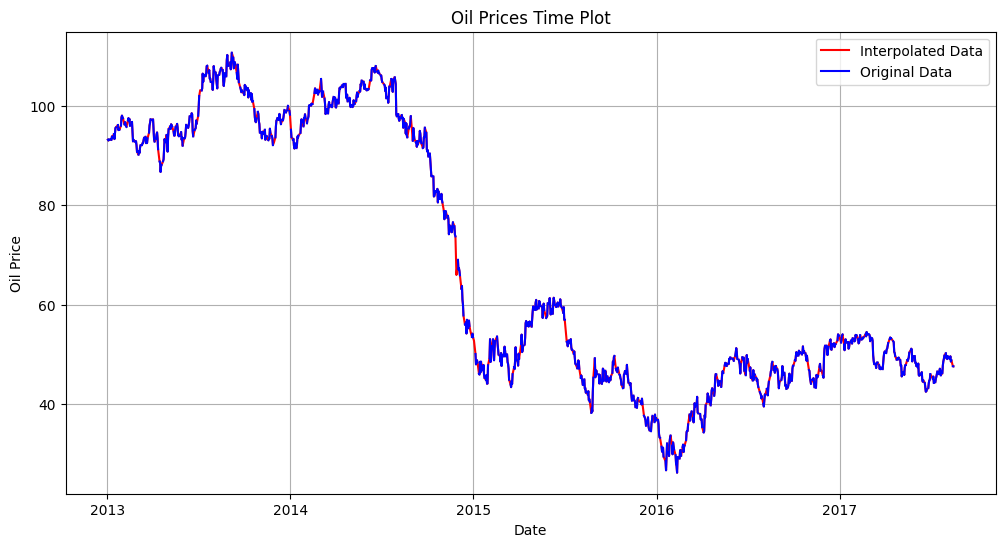

In [28]:
### 선형 보간법으로 일단 채운다고 가정 후 시각화

oil_tmp = oil.copy()
oil_tmp["date"] = pd.to_datetime(oil_tmp.date)

## 일 단위로 재구성
oil_tmp = oil_tmp.set_index("date").dcoilwtico.resample("D").mean().reset_index()

## 보간(linear interpolation)
oil_tmp["dcoilwtico"] = np.where(oil_tmp["dcoilwtico"] == 0, np.nan, oil_tmp["dcoilwtico"]) # 유가가 0인 경우 NaN으로 대체, 아니면 그대로
oil_tmp["dcoilwtico_interpolated"] = oil_tmp.dcoilwtico.interpolate()

## Plotting
plt.figure(figsize=(12, 6))
# 보간된 걸 뒤에 배경으로 깔고
plt.plot(oil_tmp['date'], oil_tmp['dcoilwtico_interpolated'], label='Interpolated Data', linestyle='-', color='red')
# 원본 데이터 그려주기
plt.plot(oil_tmp['date'], oil_tmp['dcoilwtico'], label='Original Data', linestyle='-', color='blue')

plt.title('Oil Prices Time Plot')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
### 선형 보간

# 2013-01-01은 값이 없기에 2013-01-02 값으로 채우기
train.loc[train['date'] == '2013-01-01', 'dcoilwtico'] = round(train.loc[train['date'] == '2013-01-02', 'dcoilwtico'].mean(), 2)

# 선형 보간
train['dcoilwtico'] = train['dcoilwtico'].interpolate() # default가 linear이다.
test['dcoilwtico'] = test['dcoilwtico'].interpolate() # default가 linear이다.

In [30]:
train.isna().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
state               0
type                0
cluster             0
dcoilwtico          0
transactions    30933
holiday             0
dtype: int64

In [31]:
test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
holiday        0
dtype: int64

- 적절히 처리되었다.

## **2-4. 거래량 데이터**
- 원래 `transaction.csv`에 해당했던 변수들에 대한 전처리

### **📌 결측치 처리**
- sales랑 대체로 결측치가 있는 날짜가 겹침
  - 날짜가 겹치는 경우에는 transactions을 모두 0으로 처리


In [32]:
zero_dates.head()

,store_nbr,date,sales
0,1,2013-01-01,0.00
358,1,2013-12-25,0.00
365,1,2014-01-01,0.00
723,1,2014-12-25,0.00
730,1,2015-01-01,0.00


In [33]:
# 해당 날짜의 거래량을 0으로 처리

for index, row in zero_dates.iterrows():
    store = row['store_nbr']
    date = row['date']

    train.loc[(train['store_nbr'] == store) & (train['date'] == date), 'transactions'] = 0

In [34]:
train.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
city               0
state              0
type               0
cluster            0
dcoilwtico         0
transactions    3778
holiday            0
dtype: int64

In [35]:
# 결측치가 있는 행을 추출
missing_transactions = train[train['transactions'].isnull()][['date', 'store_nbr', 'transactions']]

# 중복된 날짜 제거하여 가게별로 결측치가 있는 날짜를 리스트로 출력
missing_transactions.drop_duplicates(subset=['store_nbr', 'date']).groupby('store_nbr')['date'].apply(list).reset_index()

,store_nbr,date
0,1,"[2016-01-02, 2016-01-03]"
1,2,"[2016-01-03, 2016-01-04]"
2,3,"[2016-01-02, 2016-01-03, 2016-01-04]"
3,4,"[2016-01-02, 2016-01-03, 2016-01-04]"
4,5,"[2016-01-02, 2016-01-03]"
5,6,"[2016-01-02, 2016-01-03, 2016-01-04]"
6,7,"[2016-01-02, 2016-01-03, 2016-01-04, 2016-09-27]"
7,8,"[2016-01-02, 2016-01-03, 2016-01-04]"
8,9,"[2016-01-02, 2016-01-03, 2016-01-04]"
9,10,"[2013-06-19, 2016-01-02, 2016-01-03, 2016-01-04]"


- 해당 데이터들에 대한 결측치는 sales와의 상관 관계를 보고 다시 처리해야 할 것 같다.

## **2-5. 공휴일 처리**
- 휴일 및 이벤트에 관한 처리


In [36]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,Quito,Pichincha,D,13,93.14,0.00,National
1,1,2013-01-01,41,SEAFOOD,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National
2,2,2013-01-01,41,SCHOOL AND OFFICE SUPPLIES,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National
3,3,2013-01-01,41,PRODUCE,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National
4,4,2013-01-01,41,PREPARED FOODS,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National


In [37]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,Normal
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,Normal
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,Normal
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,Normal
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,Normal


In [38]:
train['holiday'].unique()

array(['National', 'Normal', 'Regional', 'Local'], dtype=object)

In [39]:
test['holiday'].unique()

array(['Normal', 'Local'], dtype=object)

### **a) Work Day 처리**

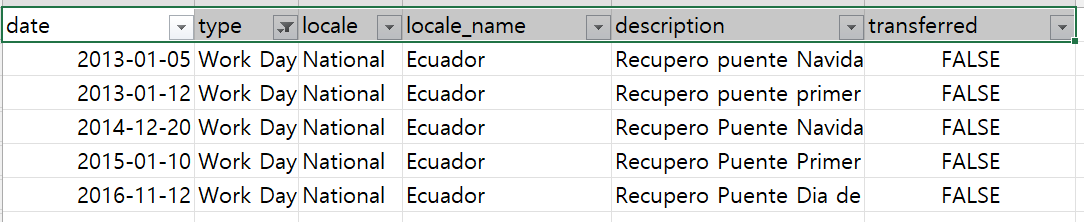

In [40]:
workday_dates = ['2013-01-05', '2013-01-12', '2014-12-20', '2015-01-10', '2016-11-12']

- 평일과 주말을 구분해보자.

In [41]:
tmp = train.copy()

# train 데이터에 있는 'date' 열을 날짜로 변환
tmp['date'] = pd.to_datetime(tmp['date'])

# 'date' 열에서 요일(0: 월요일, 1: 화요일, ..., 5: 토요일, 6: 일요일)을 추출하여 새로운 열 'day_of_week' 생성
tmp['day_of_week'] = tmp['date'].dt.dayofweek

# 'day_of_week'가 5 또는 6인 경우(토요일이나 일요일)를 주말로 표시하는 새로운 열 'is_weekend' 생성
tmp['is_weekend'] = tmp['day_of_week'].isin([5, 6]).astype(int)

# 해당 값을 train에 적용
train['weekend'] = tmp['is_weekend']

train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday,weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,Quito,Pichincha,D,13,93.14,0.00,National,0
1,1,2013-01-01,41,SEAFOOD,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National,0
2,2,2013-01-01,41,SCHOOL AND OFFICE SUPPLIES,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National,0
3,3,2013-01-01,41,PRODUCE,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National,0
4,4,2013-01-01,41,PREPARED FOODS,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National,0


In [42]:
tmp2 = test.copy()

# test 데이터에 있는 'date' 열을 날짜로 변환
tmp2['date'] = pd.to_datetime(tmp2['date'])

# 'date' 열에서 요일(0: 월요일, 1: 화요일, ..., 5: 토요일, 6: 일요일)을 추출하여 새로운 열 'day_of_week' 생성
tmp2['day_of_week'] = tmp2['date'].dt.dayofweek

# 'day_of_week'가 5 또는 6인 경우(토요일이나 일요일)를 주말로 표시하는 새로운 열 'is_weekend' 생성
tmp2['is_weekend'] = tmp2['day_of_week'].isin([5, 6]).astype(int)

# 해당 값을 test에 적용
test['weekend'] = tmp2['is_weekend']

test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday,weekend
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,Normal,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,Normal,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,Normal,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,Normal,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,Normal,0


In [43]:
## Work Day 처리
# Work Day에 속하는 날짜인 경우 주말이여도 근무 -> 평일(0)로 바꾸기

train.loc[train['date'].isin(workday_dates), 'weekend'] = 0
test.loc[test['date'].isin(workday_dates), 'weekend'] = 0

### **b) 휴일 유형 처리**
- 휴일 유형을 다음과 같이 5개로 재정의
  - National:국경일
  - Regional: 지역(state) 휴일
  - Local: 지역(city) 휴일
  - Weekend: 쉬는 주말
  - Weekday: 평일(+주말인데도 근무일, Work Day 유형 처리)


In [44]:
# Normal을 평일과 주말로 나눠보자!

train.loc[(train['holiday'] == 'Normal') & (train['weekend'] == 0), 'holiday'] = 'Weekday'
train.loc[(train['holiday'] == 'Normal') & (train['weekend'] == 1), 'holiday'] = 'Weekend'

train['holiday'].unique()

array(['National', 'Weekday', 'Weekend', 'Regional', 'Local'],
      dtype=object)

In [45]:
test.loc[(test['holiday'] == 'Normal') & (test['weekend'] == 0), 'holiday'] = 'Weekday'
test.loc[(test['holiday'] == 'Normal') & (test['weekend'] == 1), 'holiday'] = 'Weekend'

test['holiday'].unique()

array(['Weekday', 'Weekend', 'Local'], dtype=object)

- 제대로 처리된 것을 확인할 수 있다.

In [46]:
# weekend 변수는 더이상 필요 없으므로 삭제

train = train.drop('weekend', axis = 1)
test = test.drop('weekend', axis = 1)

### **c) 요일 추가**

- 일단 holiday로 다 처리 가능할 것 같다 생각해서 따로 처리 안했습니다.

In [47]:
# train['day_of_week'] = pd.to_datetime(train['date']).dt.dayofweek

## **최종 확인**
- 자세한 정보는 아래 구글 문서의 마지막 페이지를 확인해 주세요.  
[데이터 구조(정의)]()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   float64
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  holiday       object 
dtypes: float64(4), int64(3), object(6)
memory usage: 268.3+ MB


In [49]:
train.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
city               0
state              0
type               0
cluster            0
dcoilwtico         0
transactions    3778
holiday            0
dtype: int64

- 대부분의 결측치는 다 해결되었음
- transactions 결측치 처리
  - 추후 논의 필요
  - 다른 변수들과의 상관관계 또는 sales에 미치는 영향을 보고 판단해야 할 것 같다.

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  int64  
 5   city         28512 non-null  object 
 6   state        28512 non-null  object 
 7   type         28512 non-null  object 
 8   cluster      28512 non-null  int64  
 9   dcoilwtico   28512 non-null  float64
 10  holiday      28512 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.4+ MB


- 결측치는 다 해결되었음

**파일 저장**

In [51]:
train.to_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/winter_proj/data/train_preprocessed.csv', index = False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/winter_proj/data/test_preprocessed.csv', index = False)